<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/teoriegrafu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teorie grafů

## Matematický popis

$$G=(V,E)$$
$V$ je množina vrcholů, $E\subseteq\{\{x,y\}|x,y \in V, x \ne y\}$ je množina hran.

Rozlišujeme neorientované a orientované grafy.

## Grafické vyjádření

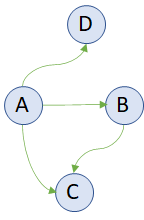

## Vyjádření ve formě incidenční matice

$$G_m=
\begin{pmatrix}
\times & 1 & 1 & 1 \\
0 & \times & 1 & 0 \\
0 & 0 & \times & 0 \\
0 & 0 & 0 & \times
\end{pmatrix}$$

Symboly $\times$ na diagonále matice představují nepřípustnost hrany, jejíž oba vrcholy jsou shodné (v některých grafech je toto možné). U existujících hran je uvedena hodnota 1, u neexistujících je uvedena hodnota 0. Řádky odpovídají vrcholům, ze kterých hrana vychází, sloupce odpovídají vrcholém, kde hrana končí.

### Vyjádření v programovacích jazycích

Vyjádření pomocí matice
```
G =[[0, 1, 1, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
```
Vyjádření pomocí dictionary
```
G = {
  'A': {'B': 1, 'C': 1, 'D': 1},
  'B': {'C': 1}
  }
```


## Ohodnocení hran

Velmi častým případem je matematický graf, ve kterém je ke každé hraně přiřazena hodnota. Datový typ obecně není omezen, často se ovšem předpokládá, že touto hodnotou je číslo.

Obdobně i k vrcholům muže být přiřazena hodnota.

## Hledání nejkratší cesty v grafu

Pro hledání nejkratší cesty v grafu je nutné mít jednotlivé hrany ohodnoceny číslem $f:V \to \mathbb{R}$ přičemž $f(v_i) \ge 0$. Předpokládá se, že délka žádné hrany není záporná.

Dijkstrův algoritmus

Mějme graf $G$, v němž hledáme nejkratší cestu. Řekněme, že $V$ je množina všech vrcholů grafu $G$ a&nbsp;množina $E$ obsahuje všechny hrany grafu $G$. Algoritmus pracuje tak, že si pro každý vrchol $v$ z&nbsp;$V$ pamatuje délku nejkratší cesty, kterou se k němu dá dostat. Označme tuto hodnotu jako $d[v]$. Na začátku mají všechny vrcholy $v$ hodnotu $d[v] = \infty$, kromě počátečního vrcholu $s$, který má $d[s]=0$. Nekonečno symbolizuje, že neznáme cestu k&nbsp;vrcholu.

Dále si algoritmus udržuje množiny $Z$ a&nbsp;$N$, kde $Z$ obsahuje už navštívené vrcholy a $N$ dosud nenavštívené. Algoritmus pracuje v&nbsp;cyklu tak dlouho, dokud $N$ není prázdná. V&nbsp;každém průchodu cyklu se přidá jeden vrchol $v_{min}$ z&nbsp;$N$ do&nbsp;$Z$, a&nbsp;to takový, který má nejmenší hodnotu $d[v]$ ze&nbsp;všech vrcholů $v$ z&nbsp;$N$.

Pro každý vrchol $u$, do&nbsp;kterého vede hrana (označme její délku jako $l(v_{min},u)$) z $v_{min}$, se provede následující operace: pokud $(d[v_{min}] + l(v_{min},u)) < d[u]$, pak do&nbsp;$d[u]$ přiřaď hodnotu $d[v_{min}] + l(v_{min},u)$, jinak neprováděj nic.

Když algoritmus skončí, pro každý vrchol $v$ z&nbsp;$V$ je délka jeho nejkratší cesty od počátečního vrcholu $s$ uložena v&nbsp;$d[v]$.

Převzato z [Wiki](https://cs.wikipedia.org/wiki/Dijkstr%C5%AFv_algoritmus).

### Výpočet s využitím Python

In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()   # neorientovaný
G = nx.DiGraph() # orientovaný
G.add_edge('A', 'B', weight=4, delka=4, doba=2.8)
G.add_edge('B', 'D', weight=2, delka=2, doba=2.5)
G.add_edge('A', 'C', weight=3, delka=3, doba=3.5)
G.add_edge('C', 'D', weight=4, delka=4, doba=4.5)
path = nx.shortest_path(G, 'A', 'D', weight='doba')
print(path)

['A', 'B', 'D']


### Základní operace nad grafem v Python

#### Výpis grafu

In [ ]:
def displayGraph(G):
  for nodeid, params in G.nodes.data():
    print(nodeid, params)
  for nodeA, nodeB, params in G.edges.data():
    print(nodeA, nodeB, params)

displayGraph(G)

A {}
B {}
D {}
C {}
A B {'weight': 4, 'delka': 4, 'doba': 2.8}
A C {'weight': 3, 'delka': 3, 'doba': 3.5}
B D {'weight': 2, 'delka': 2, 'doba': 2.5}
C D {'weight': 4, 'delka': 4, 'doba': 4.5}


#### Získání atributů vrcholu

In [ ]:
print(G.nodes['A'])

{}


#### Nastavení atributu u vrcholu

In [ ]:
G.nodes['A']['s'] = 1
print(G.nodes['A'])

{'s': 1}


#### Získání atributů hrany

In [ ]:
print(G.edges['A', 'B'])

{'weight': 4, 'delka': 4, 'doba': 2.8}


#### Nastavení atributu u hrany

In [ ]:
G.edges['A', 'B']['visited'] = True
print(G.edges['A', 'B'])

{'weight': 4, 'delka': 4, 'doba': 2.8, 'visited': True}


#### Následníci z vrcholu

In [ ]:
def getAscendents(G, node): # Vrací následníky vrcholu v grafu
  for item in nx.networkx.classes.function.neighbors(G, node):
    yield item
  pass

for node in getAscendents(G, 'A'):
  print(node)

B
C


#### Předchůdci z vrcholu

In [ ]:
def getPrecedents(G, node): # Vrací předchůdce vrcholu v grafu
  for startNode, endNode, attributes in G.edges.data():
    if endNode == node:
      yield startNode
  pass

for node in getPrecedents(G, 'D'):
  print(node)

B
C


#### Vykreslení grafu

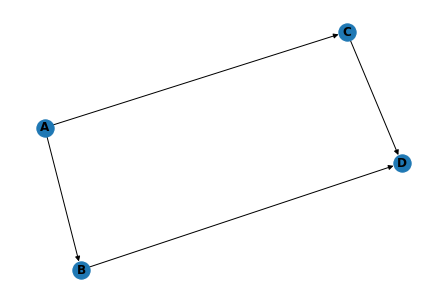

In [ ]:
nx.draw(G, with_labels=True, font_weight='bold')

#### Vykreslení grafu II

In [ ]:
G = nx.DiGraph()
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_node('E')
G.add_node('F')
G.add_node('G')
G.add_node('H')
c = 0.01
pos = {
    'A': (c * 0, c * 50),
    'B': (c * 50, c * 25),
    'C': (c * 50, c * 75),
    'E': (c * 150, c * 25),
    'D': (c * 100, c * 50),
    'F': (c * 100, c * 100),
    'G': (c * 150, c * 75),
    'H': (c * 200, c * 50)
       }
G.add_edge('A', 'B', sigma = 1, mean = 30, current = 30)
G.add_edge('A', 'C', sigma = 3, mean = 20, current = 20)
G.add_edge('B', 'E', sigma = 2, mean = 10, current = 10)
G.add_edge('B', 'D', sigma = 4, mean = 40, current = 40)
G.add_edge('C', 'D', sigma = 1, mean = 20, current = 20)
G.add_edge('C', 'F', sigma = 2, mean = 20, current = 20)
G.add_edge('D', 'H', sigma = 3, mean = 30, current = 30)
G.add_edge('D', 'G', sigma = 1, mean = 20, current = 20)
G.add_edge('E', 'H', sigma = 4, mean = 10, current = 10)
G.add_edge('F', 'G', sigma = 2, mean = 30, current = 30)
G.add_edge('G', 'H', sigma = 2, mean = 40, current = 40)

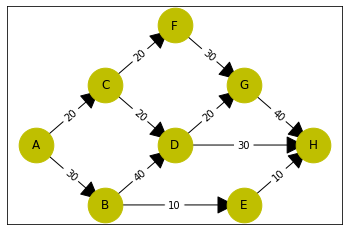

In [ ]:
def printGraph(G, pos, edgeAttributeName):

  edge_labels = nx.get_edge_attributes(G, edgeAttributeName)
  #node_labels = nx.get_node_attributes(G, 'highRange')

  _ = nx.networkx.draw_networkx_nodes(G, pos, node_color='y', node_size=1200)
  _ = nx.networkx.draw_networkx_edges(G, pos, label='current', arrowsize=40)

  _ = nx.networkx.draw_networkx_labels(G, pos)
  _ = nx.networkx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)

printGraph(G)

### Příklady

#### Příklad podle WM

#### Příklad podle NP

#### Příklad podle SL

## Metoda kritické cesty (Critical path method CPM)

V této úloze hrany představují činnosti a ohodnocení hrany určuje dobu trvání činností. Vrcholy reprezentují návaznosti činností.

|ID |Předchůdci|Trvání|
|:-:|:--------:|:----:|
|A  |          |3     |
|B  |          |5     |
|C  |          |4     |
|D  |A         |9     |
|E  |C         |2     |
|F  |B, D, E   |3     |
|G  |C         |2     |
|H  |A         |14    |
|I  |H         |2     |
|J  |F, G, H   |5     |
|K  |F, G, H   |1     |
|L  |K         |9     |
|M  |I, J      |7     |
|N  |L, M      |1     |

#### Řešení v Python

In [ ]:
gDict = {
    'A': {'pre': [], 'duration': 3},
    'B': {'pre': [], 'duration': 5},
    'C': {'pre': [], 'duration': 4},
    'D': {'pre': ['A'], 'duration': 9},
    'E': {'pre': ['C'], 'duration': 2},
    'F': {'pre': ['B', 'D', 'E'], 'duration': 3},
    'G': {'pre': ['C'], 'duration': 2},
    'H': {'pre': ['A'], 'duration': 14},
    'I': {'pre': ['H'], 'duration': 2},
    'J': {'pre': ['F', 'G', 'H'], 'duration': 5},
    'K': {'pre': ['F', 'G', 'H'], 'duration': 1},
    'L': {'pre': ['K'], 'duration': 9},
    'M': {'pre': ['I', 'J'], 'duration': 7},
    'N': {'pre': ['L', 'M'], 'duration': 1},
    }
c = 0.01
pos = {
    '0': (c * 0, c * 75),
    'A': (c * 50, c * 25),
    'B': (c * 50, c * 75),
    'C': (c * 50, c * 125),
    'D': (c * 100, c * 50),
    'E': (c * 100, c * 100),
    'F': (c * 150, c * 75),
    'G': (c * 150, c * 125),
    'H': (c * 150, c * 25),
    'I': (c * 200, c * 25),
    'J': (c * 200, c * 125),
    'K': (c * 200, c * 75),
    'L': (c * 250, c * 75),
    'M': (c * 250, c * 25),
    'N': (c * 300, c * 75)
       }    

In [ ]:
def fromDictToDiGraph(desc):
  result = nx.DiGraph()
  result.add_node('0')
  for taskId, taskData in desc.items():
    result.add_node(taskId)
  for taskId, taskData in desc.items():
    prevTasks = taskData['pre']
    duration = taskData['duration']
    for prevTask in prevTasks:
      result.add_edge(prevTask, taskId, duration=duration)
    if len(prevTasks) == 0:
      result.add_edge('0', taskId, duration=duration)
  return result

G = fromDictToDiGraph(gDict)
displayGraph(G)

0 {}
A {}
B {}
C {}
D {}
E {}
F {}
G {}
H {}
I {}
J {}
K {}
L {}
M {}
N {}
0 A {'duration': 3}
0 B {'duration': 5}
0 C {'duration': 4}
A D {'duration': 9}
A H {'duration': 14}
B F {'duration': 3}
C E {'duration': 2}
C G {'duration': 2}
D F {'duration': 3}
E F {'duration': 3}
F J {'duration': 5}
F K {'duration': 1}
G J {'duration': 5}
G K {'duration': 1}
H I {'duration': 2}
H J {'duration': 5}
H K {'duration': 1}
I M {'duration': 7}
J M {'duration': 7}
K L {'duration': 9}
L N {'duration': 1}
M N {'duration': 1}


#### Datová incializace

In [ ]:
def initStatistic(G): # Inicializuje úložiště výsledků pro jednotlivé hrany
  for id, params in G.nodes.data():
    params['deltaHistory'] = []

def initNodesData(G): # Provádí inicializaci před výpočtem CPM
  for id, params in G.nodes.data():
    params['done'] = False #
    params['lowRange'] = 0
    params['highRange'] = 1000
    params['delta'] = 1000

initStatistic(G)
initNodesData(G)
displayGraph(G)

0 {'deltaHistory': [], 'done': False, 'lowRange': 0, 'highRange': 1000, 'delta': 1000}
A {'deltaHistory': [], 'done': False, 'lowRange': 0, 'highRange': 1000, 'delta': 1000}
B {'deltaHistory': [], 'done': False, 'lowRange': 0, 'highRange': 1000, 'delta': 1000}
C {'deltaHistory': [], 'done': False, 'lowRange': 0, 'highRange': 1000, 'delta': 1000}
D {'deltaHistory': [], 'done': False, 'lowRange': 0, 'highRange': 1000, 'delta': 1000}
E {'deltaHistory': [], 'done': False, 'lowRange': 0, 'highRange': 1000, 'delta': 1000}
F {'deltaHistory': [], 'done': False, 'lowRange': 0, 'highRange': 1000, 'delta': 1000}
G {'deltaHistory': [], 'done': False, 'lowRange': 0, 'highRange': 1000, 'delta': 1000}
H {'deltaHistory': [], 'done': False, 'lowRange': 0, 'highRange': 1000, 'delta': 1000}
I {'deltaHistory': [], 'done': False, 'lowRange': 0, 'highRange': 1000, 'delta': 1000}
J {'deltaHistory': [], 'done': False, 'lowRange': 0, 'highRange': 1000, 'delta': 1000}
K {'deltaHistory': [], 'done': False, 'lowR

#### Dopředné vyhodnocení u jednoho vrcholu

In [ ]:
def forwardEvaluation(G, node): # První fáze CPM u daného uzlu
  timeMax = 0
  for id in getPrecedents(G, node):
    #print('forwardEvaluation', id)
    attributes = G.nodes[id] #getNodeAttributes(G, id)
    edgeAttributes = G.get_edge_data(id, node)
    currentTime = attributes['lowRange'] + edgeAttributes['duration']
    if timeMax < currentTime:
      timeMax = currentTime
  nodeAttributes = G.nodes[node]
  nodeAttributes['lowRange'] = timeMax
  nodeAttributes['done'] = True

#### Dopředné vyhodnocení u všech vrcholů

In [ ]:
def forwardEvaluationAll(G, firstNode): # První fáze CPM u všech uzlů
  forwardEvaluation(G, firstNode)

  while True:
    goDeeper = False
    nodeToEvaluate = None
    for node, attributes in G.nodes.data():
      if attributes['done'] == False:
        done = False
        nodeToEvaluate = node
        break

    if nodeToEvaluate is None:
      break

    while True:
      goDeeper = False
      pre = list(getPrecedents(G, nodeToEvaluate))
      if len(pre) == 0:
        break
      for nextNode in pre:
        nextNodeAttributes = G.nodes[nextNode]
        if nextNodeAttributes['done'] == False:
          nodeToEvaluate = nextNode
          goDeeper = True
          break
      if goDeeper == False:
        break

    forwardEvaluation(G, nodeToEvaluate)    

#### Zpětné vyhodnocení jednoho vrcholu

In [ ]:
def backwardEvaluation(G, node): # Druhá fáze CPM u daného uzlu
  timeMin = 1000
  for id in getAscendents(G, node):
    attributes = G.nodes[id]
    edgeAttributes = G.get_edge_data(node, id)
    currentTime = attributes['highRange'] - edgeAttributes['duration']
    #print(node, id, currentTime)
    if timeMin > currentTime:
      timeMin = currentTime
    #print(node, id, edgeAttributes)
  nodeAttributes = G.nodes[node]
  nodeAttributes['highRange'] = timeMin
  nodeAttributes['done'] = True
  #print(nodeAttributes)

#### Zpětné vyhodnocení všech vrcholů

In [ ]:
def backwardEvaluationAll(G, firstNode): # Druhá fáze CPM pro všechny uzly
  attributes = G.nodes[firstNode]
  attributes['highRange'] = attributes['lowRange']
  attributes['done'] = True
  attributes = G.nodes[firstNode]

  while True:
    done = True
    nodeToEvaluate = None
    for node, attributes in G.nodes.data():
      if attributes['done'] == False:
        done = False
        nodeToEvaluate = node
        break

    if nodeToEvaluate is None:
      break

    while True:
      goDeeper = False
      asc = list(getAscendents(G, nodeToEvaluate))
      if len(asc) == 0:
        break
      for nextNode in asc:
        nextNodeAttributes = G.nodes[nextNode]
        if nextNodeAttributes['done'] == False:
          nodeToEvaluate = nextNode
          goDeeper = True
          break
      if goDeeper == False:
        break

    backwardEvaluation(G, nodeToEvaluate)

#### Metoda CPM

In [ ]:
def cpm(G): # Kompletní metoda CPM
  initNodesData(G) # inicializace uzlů
  forwardEvaluationAll(G, '0') # První fáze u všech uzlů
  for id, params in G.nodes.data(): # nastavení příznaku "Hotovo" pro druhou fázi
    params['done'] = False #
  backwardEvaluationAll(G, 'N') # Druhá fáze
  for id, params in G.nodes.data(): # Vyhodnocení rezerv pro všechny uzly
    params['delta'] = params['highRange'] - params['lowRange']

cpm(G)    
displayGraph(G)

0 {'deltaHistory': [], 'done': True, 'lowRange': 0, 'highRange': 0, 'delta': 0}
A {'deltaHistory': [], 'done': True, 'lowRange': 3, 'highRange': 3, 'delta': 0}
B {'deltaHistory': [], 'done': True, 'lowRange': 5, 'highRange': 14, 'delta': 9}
C {'deltaHistory': [], 'done': True, 'lowRange': 4, 'highRange': 12, 'delta': 8}
D {'deltaHistory': [], 'done': True, 'lowRange': 12, 'highRange': 14, 'delta': 2}
E {'deltaHistory': [], 'done': True, 'lowRange': 6, 'highRange': 14, 'delta': 8}
F {'deltaHistory': [], 'done': True, 'lowRange': 15, 'highRange': 17, 'delta': 2}
G {'deltaHistory': [], 'done': True, 'lowRange': 6, 'highRange': 17, 'delta': 11}
H {'deltaHistory': [], 'done': True, 'lowRange': 17, 'highRange': 17, 'delta': 0}
I {'deltaHistory': [], 'done': True, 'lowRange': 19, 'highRange': 22, 'delta': 3}
J {'deltaHistory': [], 'done': True, 'lowRange': 22, 'highRange': 22, 'delta': 0}
K {'deltaHistory': [], 'done': True, 'lowRange': 18, 'highRange': 20, 'delta': 2}
L {'deltaHistory': [], 